# Departamento de Relações Públicas

## Importação das bibliotecas e base de dados
- https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews/codev

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
reviews_df = pd.read_csv('/content/amazon_alexa.tsv', sep = '\t')
reviews_df.shape

(3150, 5)

## Explorando os dados

- Rating:  nota que o usuário deu pro produto (quanto maior melhor 1-5)
- Variation: variação do produto
- Verified_reviews: texto do usuário para o produto
- Feedback: 1 - feedback positivo  
Precisamos da informação histórica de feedback

In [3]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


A partir de 20% da base de dados já temos rating positivos, o que significa que essa base de dados está desbalanceada

In [5]:
reviews_df.describe([.10, .20, .25, .30, .40, .50, .75])

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
10%,3.000000,1.000000
20%,4.000000,1.000000
25%,4.000000,1.000000
30%,5.000000,1.000000
40%,5.000000,1.000000
50%,5.000000,1.000000


In [6]:
reviews_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5db0e7150>,
      dtype=object)

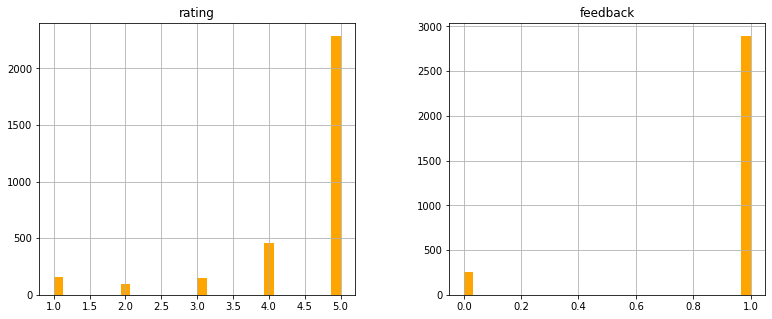

In [7]:
# Feedback é o somatório da nota 4-5 (positivo)
reviews_df.hist(bins=30, figsize=(13, 5), color = 'orange')

In [8]:
# Contagem de caracteres
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


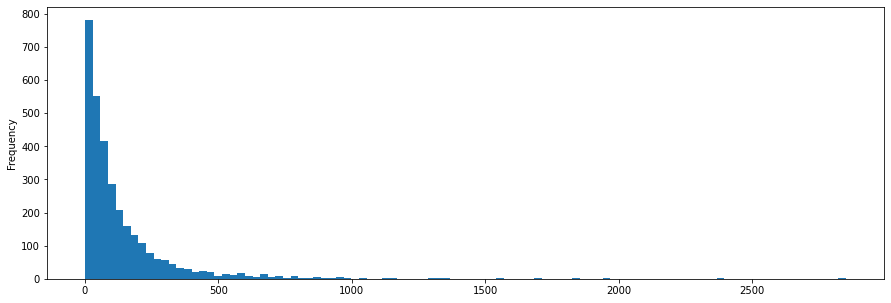

In [9]:
# Distribuição de frequência do tamanho das reviews
# Existetm feedbacks com até 2000 caracteres
reviews_df['length'].plot(bins=100, kind='hist', figsize=(15,5))

In [10]:
reviews_df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [11]:
# Maior review
reviews_df[reviews_df['length'] == reviews_df.length.max()]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [12]:
# Menor review
reviews_df[reviews_df['length'] == reviews_df.length.min()]['verified_reviews'].iloc[0]

'😍'

In [13]:
# Tamanhos médios
reviews_df[reviews_df['length'] == int(reviews_df.length.mean())]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

In [14]:
# Dataframe apenas com reviews positivas
positives = reviews_df[reviews_df['feedback'] == 1]
positives.describe()

,rating,feedback,length
count,2893.000000,2893.0,2893.000000
mean,4.737643,1.0,124.659177
std,0.546544,0.0,174.624491
min,3.000000,1.0,1.000000
25%,5.000000,1.0,29.000000
50%,5.000000,1.0,69.000000
75%,5.000000,1.0,154.000000
max,5.000000,1.0,2851.000000


In [15]:
# Dataframe apenas com reviews negativas
negatives = reviews_df[reviews_df['feedback'] == 0]
negatives.describe()

,rating,feedback,length
count,257.000000,257.0,257.000000
mean,1.373541,0.0,215.241245
std,0.484688,0.0,236.325955
min,1.000000,0.0,1.000000
25%,1.000000,0.0,53.000000
50%,1.000000,0.0,137.000000
75%,2.000000,0.0,289.000000
max,2.000000,0.0,1686.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


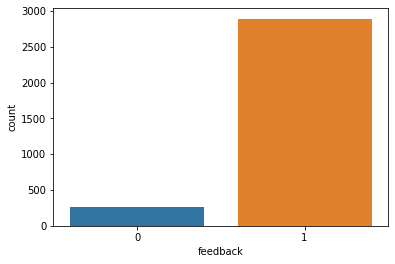

In [16]:
sns.countplot(reviews_df['feedback']);

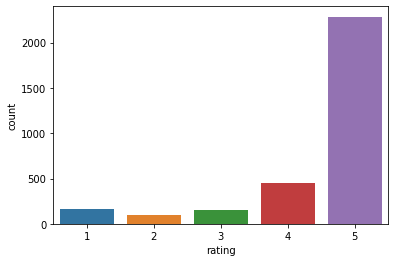

In [17]:
sns.countplot(x = 'rating', data = reviews_df)

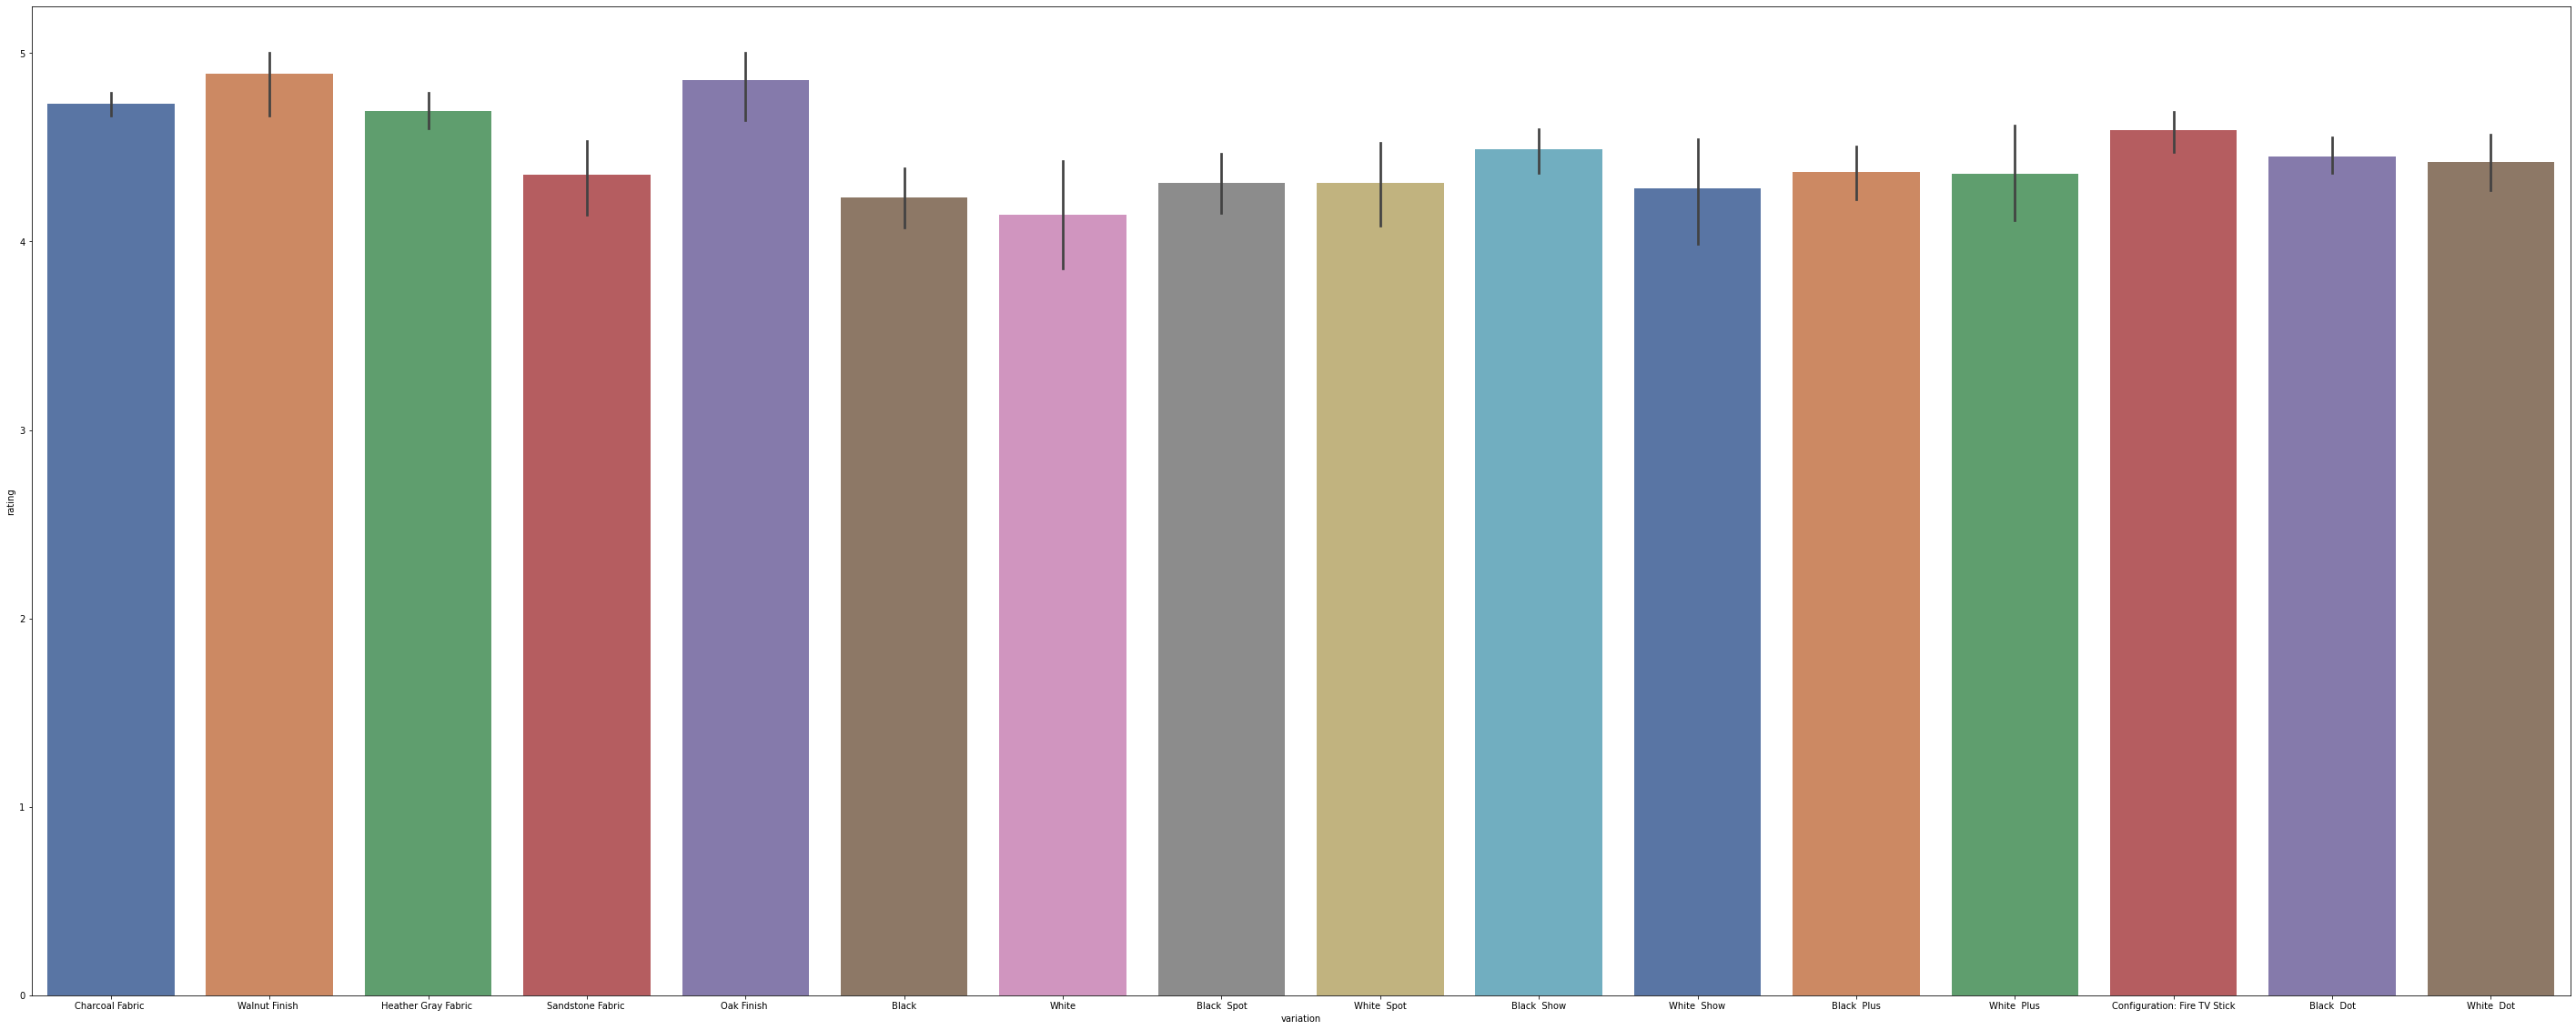

In [18]:
plt.figure(figsize=(50, 20))
sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette= 'deep')

### Nuvem de palavras

In [19]:
from wordcloud import WordCloud

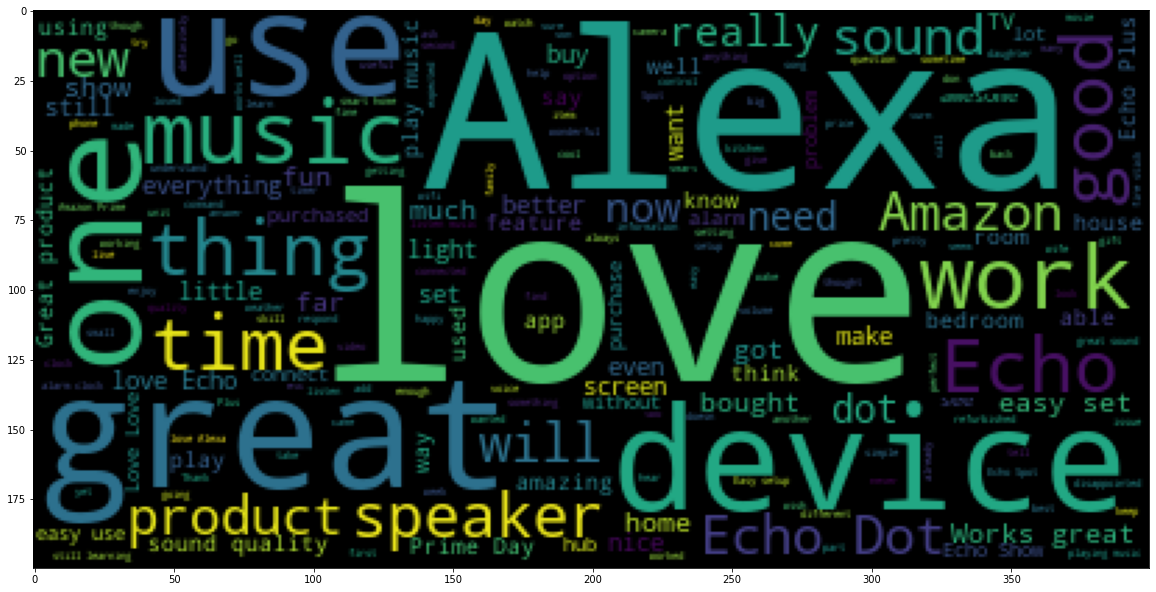

In [20]:
# NUVEM DATASET INTEIRO
sentences = reviews_df['verified_reviews'].tolist()
sentences_as_string = ' '.join(sentences)
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(sentences_as_string))

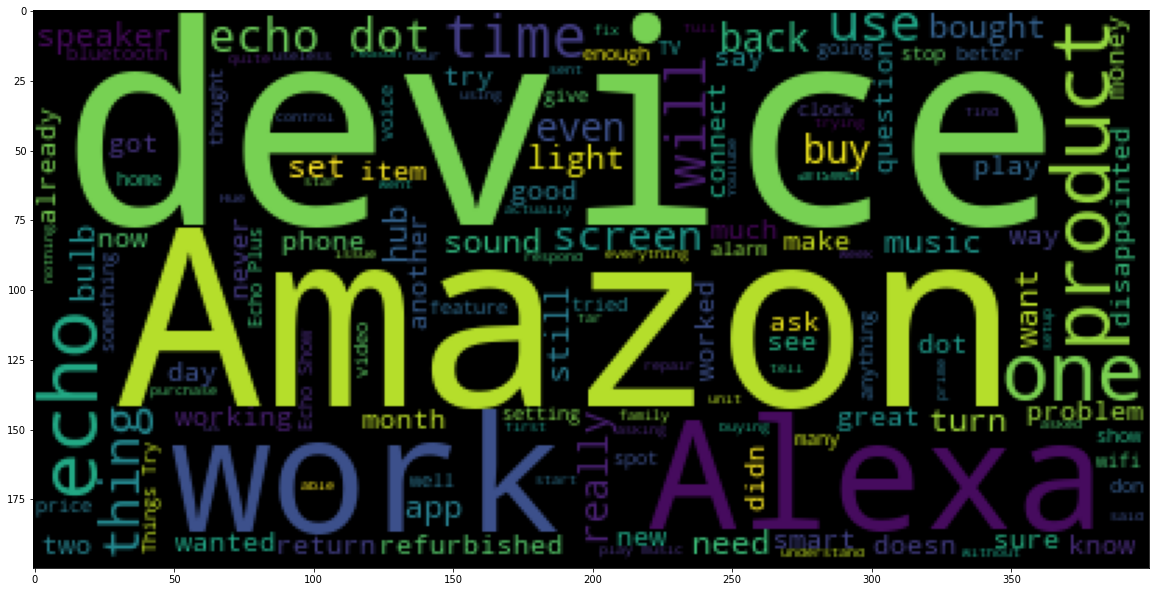

In [21]:
# NUVEM DATASET FEEDBACKS NEGATIVOS
sentences = negatives['verified_reviews'].tolist()
sentences_as_string = ' '.join(sentences)
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(sentences_as_string))

## Limpeza dos dados

In [22]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [23]:
reviews_df = reviews_df.drop(['rating', 'date', 'length'], axis=1)
reviews_df.head(2)

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1


**Variation** é um atributo categórico. Como não existe uma ordem de importância dos **variation**

In [24]:
print(f"{len(reviews_df['variation'].unique())} categorias diferentes")

16 categorias diferentes


In [25]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder()
X_cat = reviews_df[['variation']]
X_cat = OHE.fit_transform(X_cat).toarray()
X_cat, X_cat.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]), (3150, 16))

In [26]:
X_cat = pd.DataFrame(X_cat)
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
reviews_df.drop(['variation'], axis=1, inplace=True)
reviews_df = pd.concat([reviews_df, X_cat], axis=1) # axis = 1 | concatenar por coluna
reviews_df

,verified_reviews,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Love my Echo!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Loved it!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Sometimes while playing a game, you can answer...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,I have had a lot of fun with this thing. My 4 ...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Music,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,"Listening to music, searching locations, check...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,"I do love these things, i have them running my...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,Only complaint I have is that the sound qualit...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Remover pontuação

In [37]:
# Teste de remoção de pontuação
from string import punctuation

text = '- Eu não sou fraco - Então prove! Controle suas emoções, discipline sua mente!'
text = ''.join([chr for chr in text if chr not in punctuation])
print(punctuation,'\n',text)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 
  Eu não sou fraco  Então prove Controle suas emoções discipline sua mente


### Remoção de stop words

In [38]:
# Biblioteca utilizada pra trabalhar com processamento de linguagem natural
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.corpus import stopwords
print(stopwords.words('portuguese'))

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [40]:
text = [word for word in text.split() if word.lower() not in stopwords.words('portuguese')]
text

['fraco', 'Então', 'prove', 'Controle', 'emoções', 'discipline', 'mente']

### Count Vectorization (tokenização)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.'  
              ,'This document is the second document.'  
              ,'And this is the third one.'  
              ,'Is this the first document?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [43]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [44]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
